<center> 
    <h1>Bio-Informatics 3rd Assignment</h1>
    <!-- <br> -->
    <h4></h4>
    <h3>Seyed Mohammad Hossein Hashemi</h3>
    <h5>Jan 2025</h5>
    <h1></h1>

</center>

### Importing the required packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import gc
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

from tqdm import tqdm
from IPython.display import Image, display 

### Read Me

The datasets I have used for this assignment are:
- Rat (https://www.ncbi.nlm.nih.gov/protein/NP_037228.1?report=fasta)
- Human (https://www.ncbi.nlm.nih.gov/protein/ABG47031.1?report=fasta)
- Chimpanzee (https://www.ncbi.nlm.nih.gov/protein/NP_001065247.2?report=fasta)
- Crow (https://www.ncbi.nlm.nih.gov/protein/XP_031957174.1?report=fasta)
- Horse (https://www.ncbi.nlm.nih.gov/protein/NP_001157490.1?report=fasta)

# Data Preprocessing

In [2]:
def fasta_cleaner(path):
    """helper function, that cleans and extracts the ID and sequences from FASTA files"""
    raw_data = {}

    with open(path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip("\n")  

            # Header line ?
            if lines[i].startswith(">"):  
                # we will look for sequence on next lines ...
                raw_data[lines[i].lstrip(">")] = ""  
            else:  
                # Append sequence to the most recent header (Concatenate)
                last_key = list(raw_data.keys())[-1]  
                raw_data[last_key] += lines[i]  

    return raw_data


In [3]:
# Just to Verify

raw_data = fasta_cleaner("C:\\Users\\laste\\Desktop\\HW_lab\\Hemoglobins\\data.fasta")
for key, value in raw_data.items():
    print(f"{key}:\n\n{value}\n")
    print("-"*100)

NP_037228.1 hemoglobin subunit alpha-1/2 [Rattus norvegicus]:

MVLSADDKTNIKNCWGKIGGHGGEYGEEALQRMFAAFPTTKTYFSHIDVSPGSAQVKAHGKKVADALAKAADHVEDLPGALSTLSDLHAHKLRVDPVNFKFLSHCLLVTLACHHPGDFTPAMHASLDKFLASVSTVLTSKYR

----------------------------------------------------------------------------------------------------
ABG47031.1 hemoglobin, partial [Homo sapiens]:

MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFR

----------------------------------------------------------------------------------------------------
NP_001065247.2 hemoglobin subunit gamma-1 [Pan troglodytes]:

MGHFTEEDKATITSLWGKVNVEDAGGETLGRLLVVYPWTQRFFDSFGNLSSASAIMGNPKVKAHGKKVLTSLGDAIKHLDDLKGTFAQLSELHCDKLHVDPENFKLLGNVLVTVLAIHFGKEFTPEVQASWQKMVTGVASALSSRYH

----------------------------------------------------------------------------------------------------
XP_031957174.1 hemoglobin subunit rho [Corvus moneduloides]:

MAPLQGPGRGCGQGIKAPAGPGLSYGVCVLLQPSPAAATMVHWSAEEKQLIASVWGKVSVEE

In [4]:
del raw_data

### Now lets convert the FASTA file contents into a Pandas Data for better access

In [5]:
import pandas as pd
raw_data = fasta_cleaner("C:\\Users\\laste\\Desktop\\HW_lab\\Hemoglobins\\data.fasta")

df = pd.DataFrame(data = raw_data.items(), columns = ['ID', 'Sequence'])
df.head()

,ID,Sequence
0,NP_037228.1 hemoglobin subunit alpha-1/2 [Ratt...,MVLSADDKTNIKNCWGKIGGHGGEYGEEALQRMFAAFPTTKTYFSH...
1,"ABG47031.1 hemoglobin, partial [Homo sapiens]",MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESF...
2,NP_001065247.2 hemoglobin subunit gamma-1 [Pan...,MGHFTEEDKATITSLWGKVNVEDAGGETLGRLLVVYPWTQRFFDSF...
3,XP_031957174.1 hemoglobin subunit rho [Corvus ...,MAPLQGPGRGCGQGIKAPAGPGLSYGVCVLLQPSPAAATMVHWSAE...
4,NP_001157490.1 hemoglobin subunit beta [Equus ...,MVQLSGEEKAAVLALWDKVNEEEVGGEALGRLLVVYPWTQRFFDSF...


### Verification pt.1

In [6]:
# Just to double check and make sure the sequences are correctly aligned ...

# The ID should be
# 1HSM__ALL[a]

# The sequence should be 
# NAPKRPPSAFFLFCSEYRPKIKGEHPGLSIGDVAKKLGEMWNNTAADDKQPYEKKAAKLKEKYEKDIAAYRAKGKPDAA

print(f"{df.loc[0].ID}\n\n{df.loc[0].Sequence}")

NP_037228.1 hemoglobin subunit alpha-1/2 [Rattus norvegicus]

MVLSADDKTNIKNCWGKIGGHGGEYGEEALQRMFAAFPTTKTYFSHIDVSPGSAQVKAHGKKVADALAKAADHVEDLPGALSTLSDLHAHKLRVDPVNFKFLSHCLLVTLACHHPGDFTPAMHASLDKFLASVSTVLTSKYR


### Data Extraction

In [7]:
df["ID"].unique()

array(['NP_037228.1 hemoglobin subunit alpha-1/2 [Rattus norvegicus]',
       'ABG47031.1 hemoglobin, partial [Homo sapiens]',
       'NP_001065247.2 hemoglobin subunit gamma-1 [Pan troglodytes]',
       'XP_031957174.1 hemoglobin subunit rho [Corvus moneduloides]',
       'NP_001157490.1 hemoglobin subunit beta [Equus caballus]'],
      dtype=object)

In [8]:
# Encoding the values for better readability
df['Type'] = None

for row in range(0,len(df)):
    if "NP_037228.1" in df.loc[row].ID:
        df["Type"][row:row+1] = "Rat"
    elif "ABG47031.1" in df.loc[row].ID:
        df["Type"][row:row+1] = "Human"
    elif "NP_001065247.2" in df.loc[row].ID:
        df["Type"][row:row+1] = "chimpanzee"
    elif "XP_031957174.1" in df.loc[row].ID:
        df["Type"][row:row+1] = "crow"
    elif "NP_001157490.1" in df.loc[row].ID:
        df["Type"][row:row+1] = "horse"
    else:
        print("nothing happened!")
        

In [9]:
df.drop(["ID"], axis =1, inplace = True)
df

,Sequence,Type
0,MVLSADDKTNIKNCWGKIGGHGGEYGEEALQRMFAAFPTTKTYFSH...,Rat
1,MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESF...,Human
2,MGHFTEEDKATITSLWGKVNVEDAGGETLGRLLVVYPWTQRFFDSF...,chimpanzee
3,MAPLQGPGRGCGQGIKAPAGPGLSYGVCVLLQPSPAAATMVHWSAE...,crow
4,MVQLSGEEKAAVLALWDKVNEEEVGGEALGRLLVVYPWTQRFFDSF...,horse


In [10]:
def alignment_analsys(seq_1, seq_2):
    
    # Ensure both sequences are of the same length
    # temp_len = len(seq_1) if len(seq_1) <= len(seq_2) else len(seq_2) 
    # matrix = np.full((temp_len, temp_len), '', dtype='U1')

    """Instead of keeping the shorter sequence we decided to padd it to the same length as the larger one"""
    temp_len = max(len(seq_1), len(seq_2))
    seq_1 = seq_1.ljust(temp_len, '-')  # Padding with '-'
    seq_2 = seq_2.ljust(temp_len, '-')  # Padding with '-'
    matrix = np.full((temp_len, temp_len), '', dtype='U')

    
    # Compare each character of both sequences
    for i in range(temp_len):
        for j in range(temp_len):
            
            if seq_1[i] == seq_2[j]:
                # print(f"{seq_1[i]} = {seq_2[j]}\n")
                matrix[i][j] = '*'  # Match '*'
            else:
                matrix[i][j] = ' '  # Mismatch ' '
                # print(f"{seq_1[i]} != {seq_2[j]}\n")
    
    # print(f"Dot Matrix\n{matrix}")
    # print("Done!")
    return matrix


In [11]:
def viz_dot(M, name_1, name_2):
    """Simply visualizes the dot matrix"""
    plt.figure(figsize=(12, 12))
    plt.imshow(M == '*', cmap='Greys', interpolation='nearest') 
    plt.title(f"Dot Matrix for {name_1} & {name_2}", color = "Green", fontsize=16)
    plt.xlabel(f"{name_2}", color="red", fontsize=12)
    plt.ylabel(f"{name_1}", color="red", fontsize=12)
    plt.show()
    

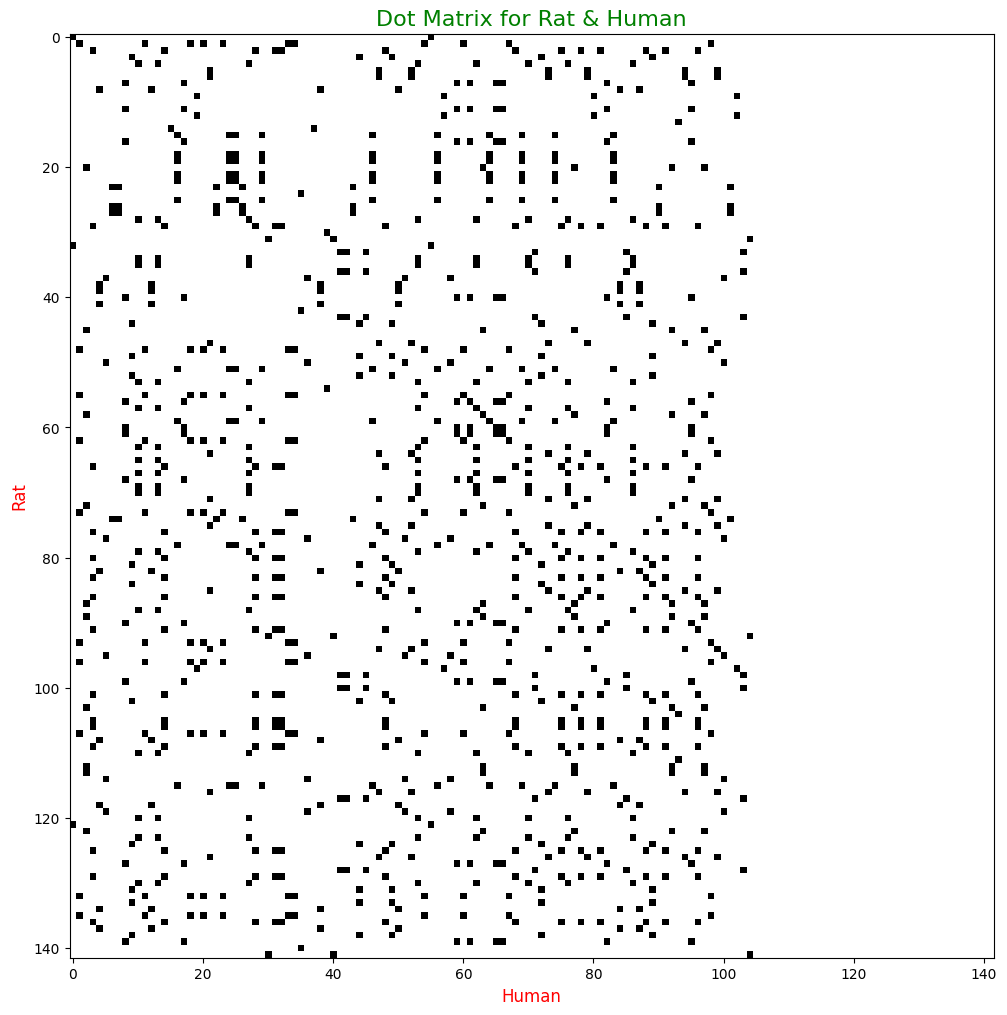

In [12]:
M = alignment_analsys(df["Sequence"][0], df["Sequence"][1])
viz_dot(M, "Rat", "Human")

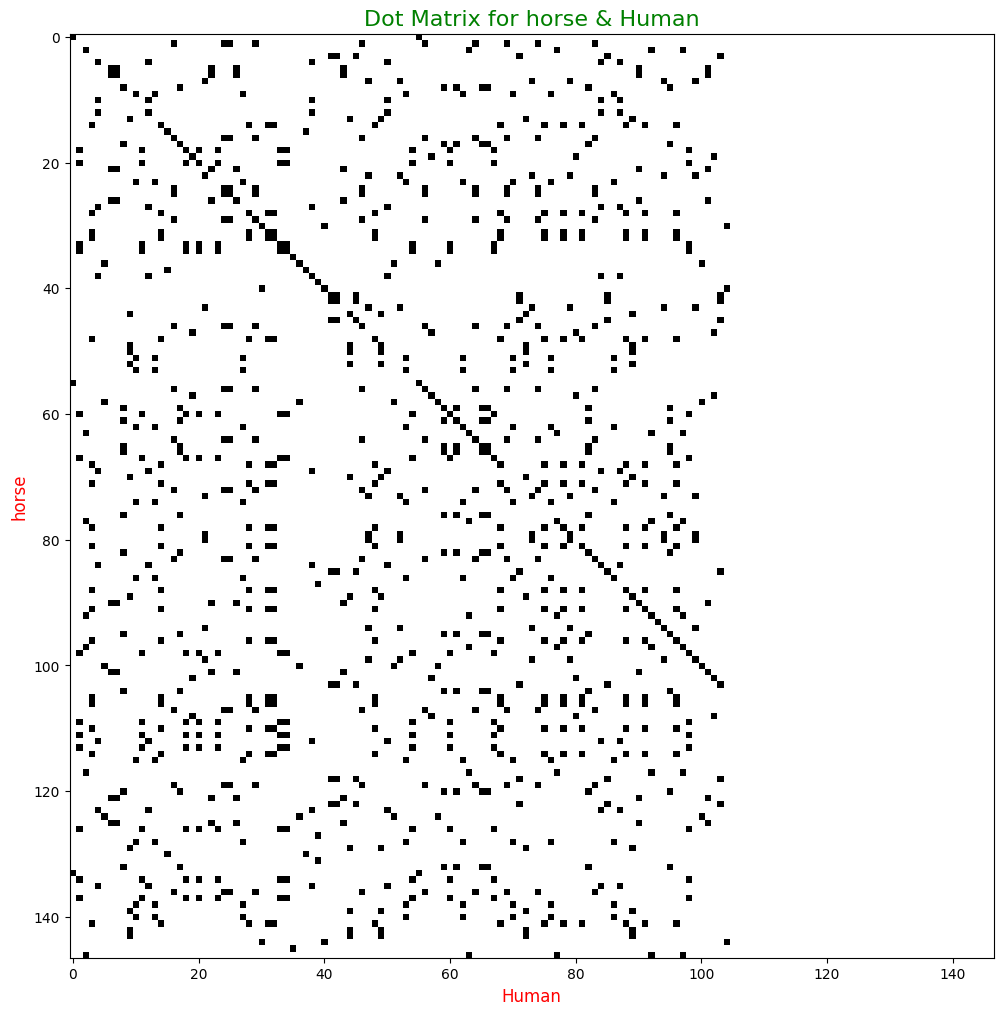

In [13]:
del M
M = alignment_analsys(df["Sequence"][2], df["Sequence"][1])
viz_dot(M, "horse", "Human")

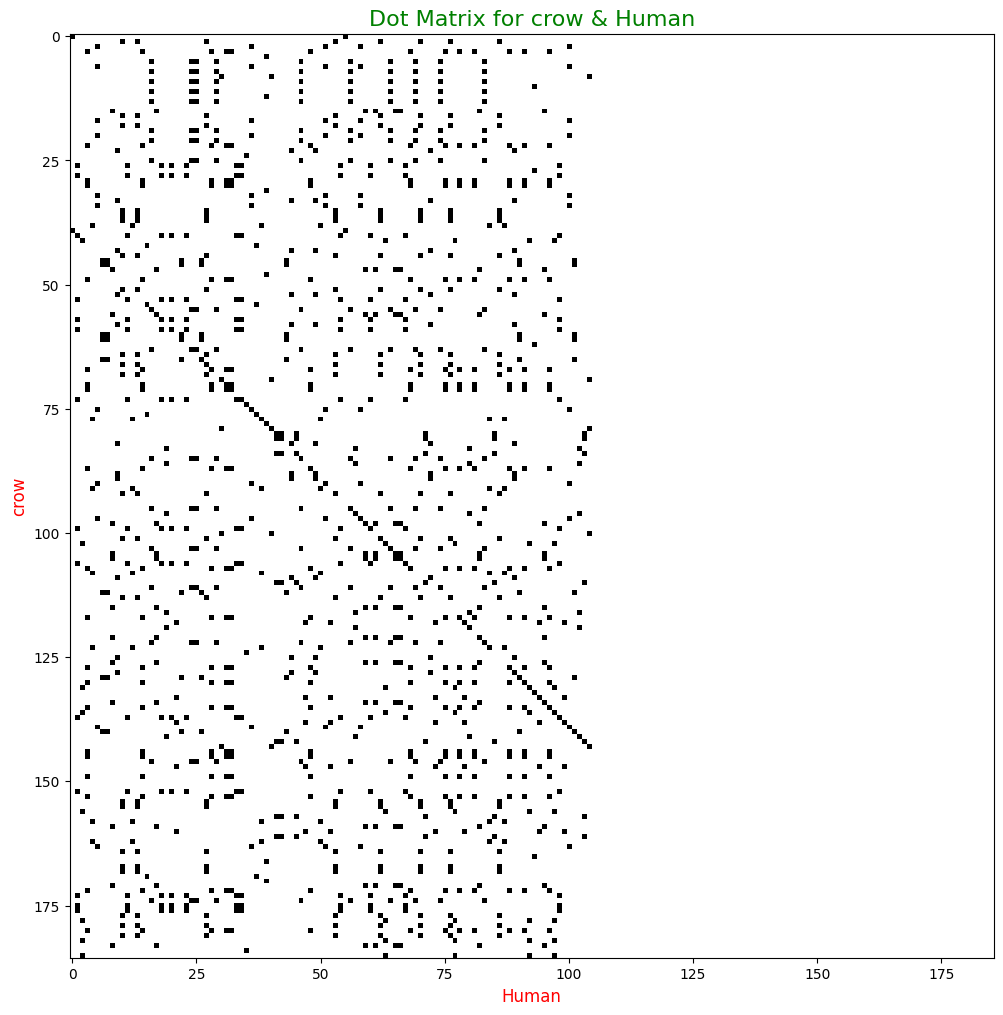

In [14]:
del M
M = alignment_analsys(df["Sequence"][3], df["Sequence"][1])
viz_dot(M, "crow", "Human")

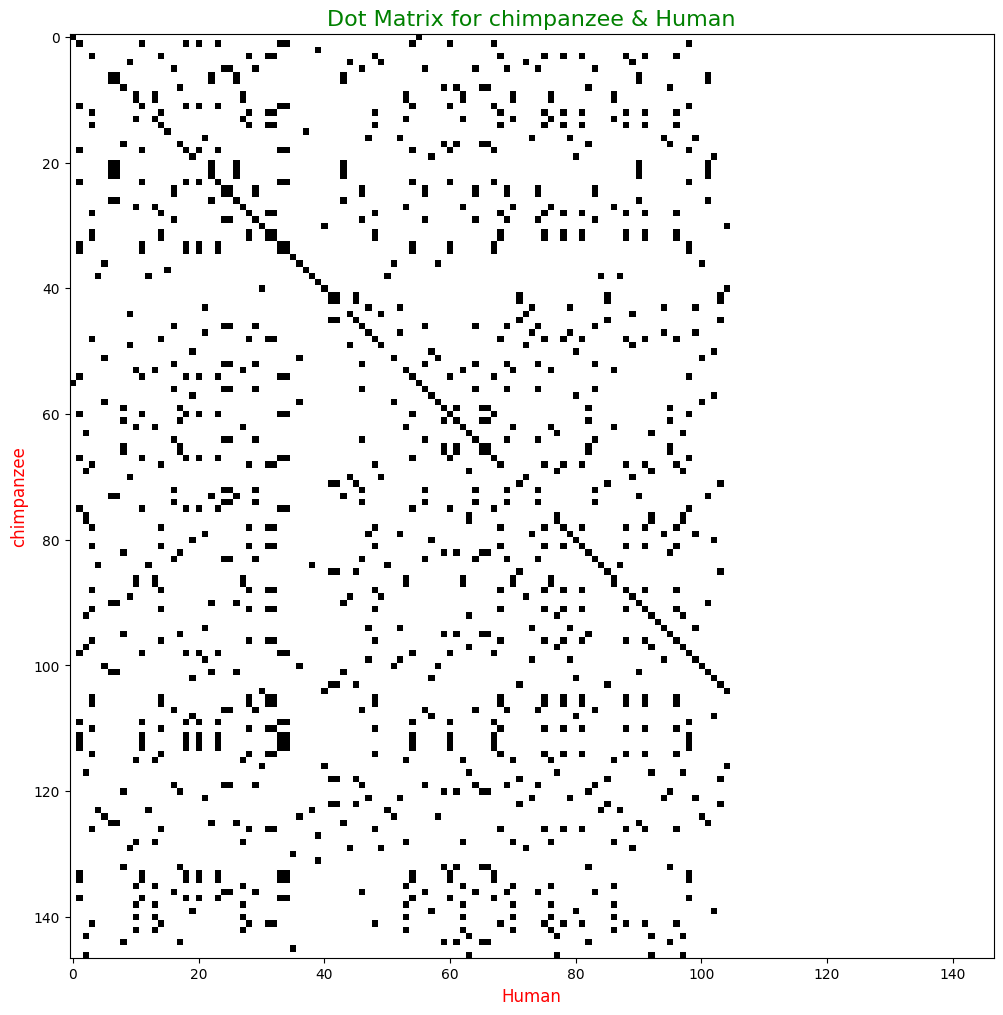

In [15]:
del M
M = alignment_analsys(df["Sequence"][4], df["Sequence"][1])
viz_dot(M, "chimpanzee", "Human")

Thanks